In [58]:
import numpy as np
import pandas as pd

Normalize continous - E(X)=0 and Var(X)=1

In [59]:
df = pd.read_csv('D:/LAP TRINH/DS102.P21.2/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [60]:
df.shape

(517, 13)

In [61]:
df.columns.values

array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'], dtype=object)

In [62]:
for col_name in df.columns:
    print('Total NaN: ', df[col_name].isna().sum(), 'in column', col_name)
    print('Total null: ', df[col_name].isnull().sum(), 'in column', col_name)
    print('Data type:', df[col_name].dtype, 'in column', col_name)
    print("_"*10)

Total NaN:  0 in column X
Total null:  0 in column X
Data type: int64 in column X
__________
Total NaN:  0 in column Y
Total null:  0 in column Y
Data type: int64 in column Y
__________
Total NaN:  0 in column month
Total null:  0 in column month
Data type: object in column month
__________
Total NaN:  0 in column day
Total null:  0 in column day
Data type: object in column day
__________
Total NaN:  0 in column FFMC
Total null:  0 in column FFMC
Data type: float64 in column FFMC
__________
Total NaN:  0 in column DMC
Total null:  0 in column DMC
Data type: float64 in column DMC
__________
Total NaN:  0 in column DC
Total null:  0 in column DC
Data type: float64 in column DC
__________
Total NaN:  0 in column ISI
Total null:  0 in column ISI
Data type: float64 in column ISI
__________
Total NaN:  0 in column temp
Total null:  0 in column temp
Data type: float64 in column temp
__________
Total NaN:  0 in column RH
Total null:  0 in column RH
Data type: int64 in column RH
__________
Tota

In [63]:
def convert_day(day: str)->int:
    day_dict = {
        'mon': 2,
        'tue': 3,
        'wed': 4, 
        'thu': 5,
        'fri': 6,       
        'sat': 7,
        'sun': 8          
    }
    return day_dict[day]

In [64]:
def convert_month(month: str)->int:
    month_dict = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12
    }
    return month_dict[month]    

In [65]:
df['month'] = df['month'].apply(convert_month)

In [66]:
df['day'] = df['day'].apply(convert_day)

In [67]:
for column in df.columns:
    if df[column].dtype == 'float64' and column != 'area':
        mean = df[column].mean()
        std = df[column].std()
        df[column] = (df[column] - mean) / std

MODEL

In [68]:
class LinearRegression:
    # RMSE : Root Mean Square Error
    def rmse (self, Y: np.array, Y_pred: np.array)->float:
        return ((Y - Y_pred)**2).mean()**0.5
    
    def fit(self, X: np.array, y: np.array)->None:
        self.thelta = np.linalg.inv(X.T @ X) @ (X.T @ y)
    
    def predict(self, X: np.array)->np.array:
        y = self.thelta.T @ X.T
        return y  

In [69]:
X_Y = df.to_numpy()
X_Y

array([[ 7.00000000e+00,  5.00000000e+00,  3.00000000e+00, ...,
         1.49716438e+00, -7.31974162e-02,  0.00000000e+00],
       [ 7.00000000e+00,  4.00000000e+00,  1.00000000e+01, ...,
        -1.74007034e+00, -7.31974162e-02,  0.00000000e+00],
       [ 7.00000000e+00,  4.00000000e+00,  1.00000000e+01, ...,
        -1.51681277e+00, -7.31974162e-02,  0.00000000e+00],
       ...,
       [ 7.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
         1.49716438e+00, -7.31974162e-02,  1.11600000e+01],
       [ 1.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
        -9.82419660e-03, -7.31974162e-02,  0.00000000e+00],
       [ 6.00000000e+00,  3.00000000e+00,  1.10000000e+01, ...,
         2.69247762e-01, -7.31974162e-02,  0.00000000e+00]],
      shape=(517, 13))

In [70]:
row = df.shape[0]
X_Y_train, X_Y_test = np.split(X_Y, indices_or_sections=[int(0.8*row)])

In [71]:
lr = LinearRegression()

In [72]:
X_train = X_Y_train[:,:12]
Y_train = X_Y_train[:,12:]

X_test = X_Y_test[:, :12]
Y_test = X_Y_test[:, 12:]

In [73]:
lr.fit(X_train, Y_train)

In [74]:
Y_pred = lr.predict(X_test)

In [75]:
Y_pred

array([[ 33.69374331,  27.22540219,  27.22851799,  17.95781577,
          5.29045576,  26.13122516,  25.93176698,  24.80686609,
         19.0696319 ,  41.4371032 ,  10.21601619,  34.859941  ,
         21.85195875,  25.90945302,  18.94199297,  19.430732  ,
         25.20418306,  33.18550059,  20.78460725,  23.65104594,
         18.96017257,  27.26131675,  12.69968915,  23.16696613,
         20.25757092,  22.15653964,   9.04489429,  27.9984751 ,
         24.72416169,  -2.55843392,  -7.60214619,  24.26947945,
          5.67393888,  19.93540951,  -1.07435372,  17.28498705,
         23.60085437,  10.61326717,  -2.47739939,  16.3105936 ,
         24.14011551,  21.20325808,   0.5955757 ,  19.16978362,
         14.28071538,  23.94769842,  25.1663665 ,  18.18995564,
         23.94769842,  21.6083746 , -10.78295762,  -8.83678729,
         -0.86550332,  -2.70779927,  -0.50866803,   6.97531005,
         10.38778686,  10.63371797,  11.20607994,   4.63469284,
         15.29853809,  14.20720122,   4.

In [76]:
lr.rmse(Y_test, Y_pred)

np.float64(80.91163282403298)

In [77]:
import matplotlib.pyplot as plt

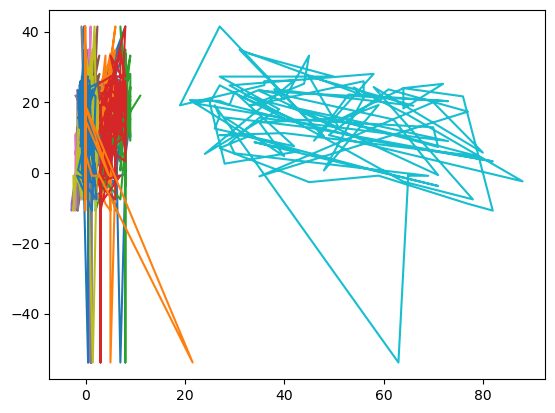

In [78]:
plt.plot(X_test, Y_pred.T)